IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [5]:
#loading the data into pandas dataframe
insurance_cost_dataset=pd.read_csv('/content/insurance.csv')

DATA ANALYSIS

In [6]:
insurance_cost_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_cost_dataset.shape

(1338, 7)

In [8]:
insurance_cost_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are three category columns
*   Sex
*   Smoker
*   Region












STATISTICAL ANALYSIS

In [9]:
insurance_cost_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
insurance_cost_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


PLOT THE  NUMERICAL FEATURES AS DIFFERENT DISTRIBUTIONS

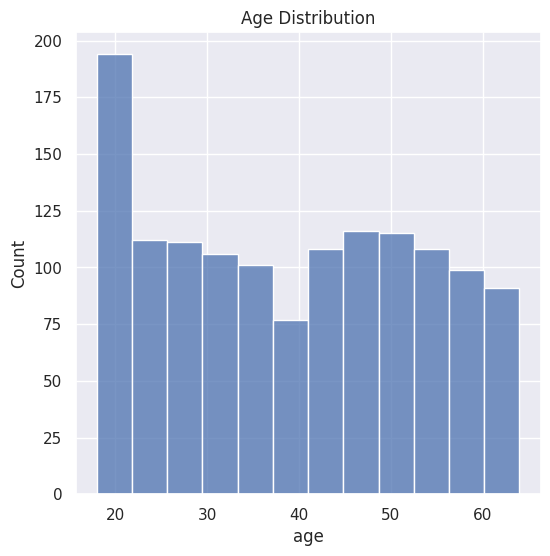

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_cost_dataset['age'])
plt.title('Age Distribution')
plt.show()

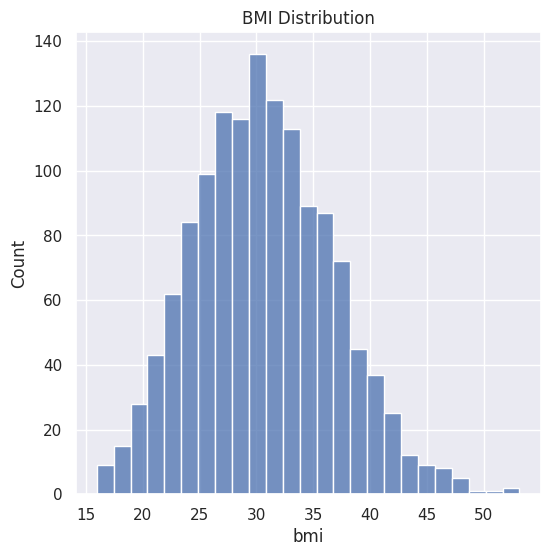

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_cost_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

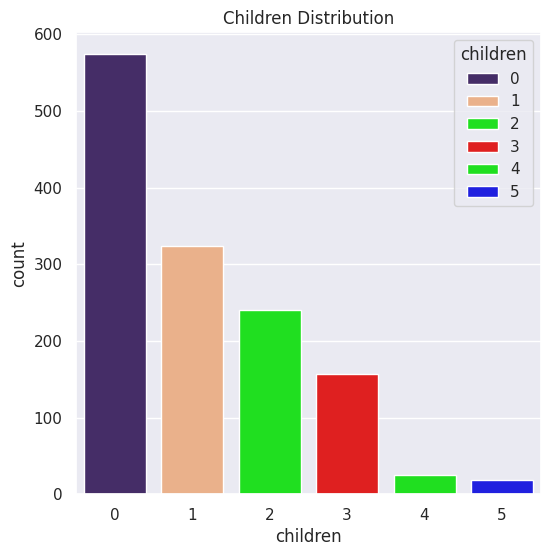

In [17]:
plt.figure(figsize=(6,6))
palette = ['#432371', '#FAAE7B', '#00FF00',"#FF0000", "#00FF00", "#0000FF"]
sns.countplot(x='children',hue='children',data=insurance_cost_dataset,palette=palette)
plt.title('Children Distribution')
plt.show()

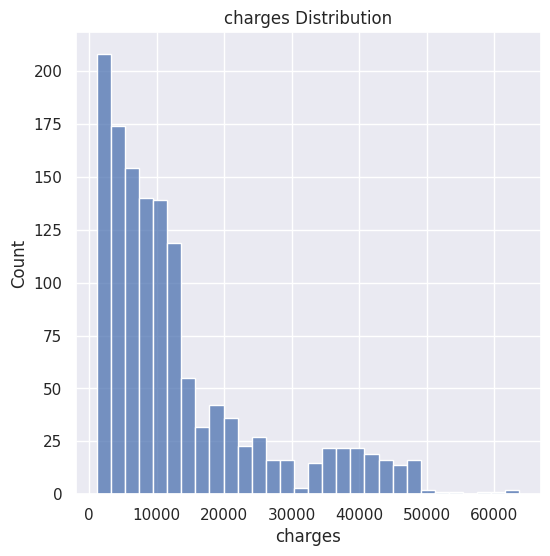

In [12]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_cost_dataset['charges'])
plt.title('charges Distribution')
plt.show()

In [ ]:
insurance_cost_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


PLOT THE CATEGORICAL FEATURES AS DISTRIBUTIONS

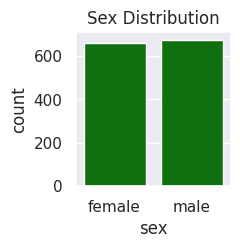

In [ ]:
plt.figure(figsize=(2,2))
sns.countplot(x='sex',data=insurance_cost_dataset,color='green')
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_cost_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


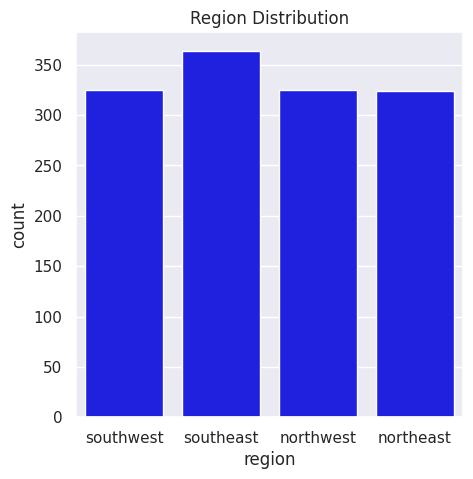

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance_cost_dataset,color='blue')
plt.title('Region Distribution')
plt.show()

In [ ]:
insurance_cost_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


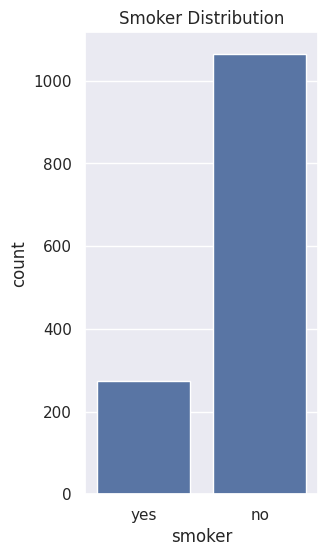

In [ ]:
plt.figure(figsize=(3,6))
sns.countplot(x='smoker',data=insurance_cost_dataset)
plt.title('Smoker Distribution')
plt.show()

In [ ]:
insurance_cost_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


DATA PRE-PROCESSING

ENCODING THE CATEGORY COLUMS

In [28]:
#encoding the sex column
insurance_cost_dataset.replace({'sex':{'male':1,'female':0}},inplace=True)

#encoding the smoker column
insurance_cost_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)

#encoding the region column
insurance_cost_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [29]:
insurance_cost_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


SPLITTING FEATURES AND TARGETS

In [30]:
X=insurance_cost_dataset.drop(columns='charges',axis=1)
y=insurance_cost_dataset['charges']

In [31]:
print(X)

print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


SPLITTING DATA INTO TRAINING AND TESTING DATA

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


MODEL TRAINING

LINEAR REGRESSION

In [34]:
#loading the regression model
model=LinearRegression()
#Scaling the train data and test data to train the model better
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)

LinearRegression()

Model Evaluation

In [45]:
print (X)

[[-1.33631918 -1.01886959 -1.41805377 -0.93004238 -0.50729114  0.49030618]
 [-0.18052529  0.98147988  0.03017623  1.56197434 -0.50729114  1.37650148]
 [ 1.33645421 -1.01886959  0.39886179 -0.93004238 -0.50729114 -0.39588912]
 ...
 [ 1.55316556  0.98147988  2.10558593 -0.93004238 -0.50729114 -0.39588912]
 [ 0.83079438 -1.01886959 -0.81075823 -0.09937014 -0.50729114 -0.39588912]
 [ 1.33645421 -1.01886959  0.28204232 -0.09937014 -0.50729114  0.49030618]]


In [46]:
print(X_test_scaled)

[[-1.19184495  0.98147988 -1.13470442 -0.93004238 -0.50729114  0.49030618]
 [ 1.11974285 -1.01886959 -0.1429817  -0.93004238 -0.50729114  0.49030618]
 [ 0.75855726  0.98147988 -0.53652246 -0.09937014 -0.50729114  0.49030618]
 ...
 [ 1.55316556 -1.01886959 -0.26891474 -0.93004238  1.97125461  1.37650148]
 [ 0.61408302  0.98147988  1.09315054  0.7313021  -0.50729114 -1.28208442]
 [ 0.83079438  0.98147988 -0.97728811  0.7313021   1.97125461  1.37650148]]


In [35]:
#prediction of training data
model_train_prediction=model.predict(X_train_scaled)

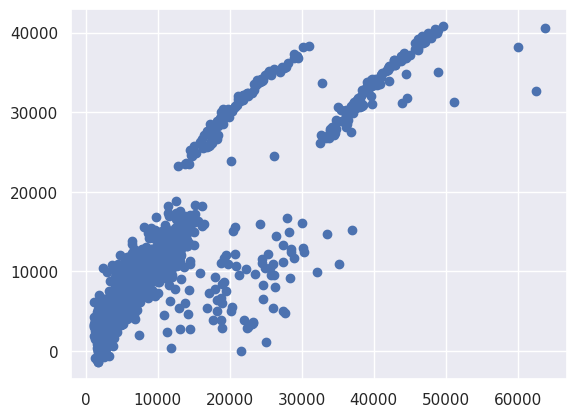

In [53]:
plt.scatter(y_train, model.predict(X_train_scaled))

In [36]:
#R squared value
r2_train=metrics.r2_score(y_train,model_train_prediction)


In [37]:
print('R square value:',r2_train)

R square value: 0.751505643411174


In [38]:
#prediction of test data
model_test_prediction=model.predict(X_test_scaled)

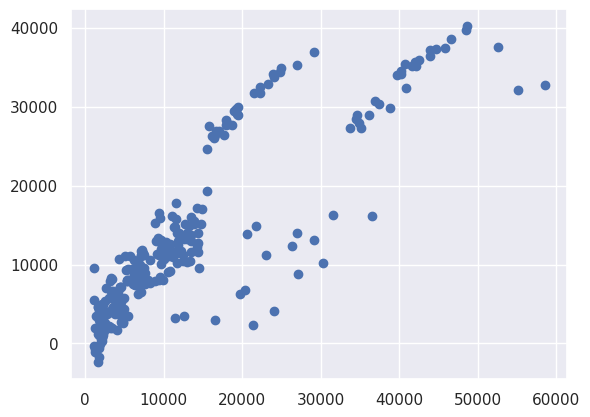

In [52]:
plt.scatter(y_test, model_test_prediction)

In [39]:
#R squared value
r2_test=metrics.r2_score(y_test,model_test_prediction)

In [40]:
print('R square value:',r2_test)

R square value: 0.7447273869684077


BUILIDING A PREDICTIVE SYSYTEM

In [41]:
INPUT_DATA=(31,0,25.74,0,0,0)
#converting input data into numpy array
input_data_as_numpy_array=np.asarray(INPUT_DATA)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
# Get column names from the original X_train DataFrame
columns = X_train.columns  # Changed from X_train_scaled to X_train

# Create a pandas DataFrame with the correct column names
input_data_df = pd.DataFrame(input_data_reshaped, columns=columns)

# Scale the input data using the same scaler used for training data
input_data_scaled = scaler.transform(input_data_df)  # Scale the input data

# Make the prediction using the scaled input data
prediction = model.predict(input_data_scaled)
print(prediction)



[3760.0805765]


In [42]:
print(input_data_df )

    age  sex    bmi  children  smoker  region
0  31.0  0.0  25.74       0.0     0.0     0.0


In [44]:
print(input_data_scaled)

[[-0.613948   -1.01886959 -0.82070032 -0.93004238 -0.50729114 -1.28208442]]


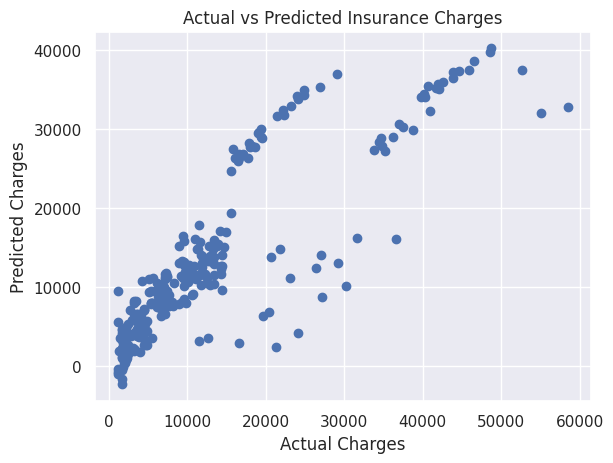

In [43]:
plt.scatter(y_test, model_test_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()